<a href="https://colab.research.google.com/github/aravind598/Data_Science_Proj/blob/master/Data%20Science%20Project/Categorical_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries


In [0]:
#Run This

In [0]:
  import numpy as np
  import pandas as pd
  import seaborn as sb
  import matplotlib.pyplot as plt # we only need pyplot
  sb.set() # set the default Seaborn style for graphics
  import statsmodels.api as sm
  %matplotlib inline
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import LinearRegression
  from sklearn.feature_selection import RFE
  from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
  from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
  from sklearn.tree import DecisionTreeClassifier
  from sklearn import metrics
  from sklearn.metrics import classification_report
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import confusion_matrix
  from sklearn.tree import export_graphviz
  from sklearn.model_selection import GridSearchCV
  import graphviz
  import plotly.offline as py
  import plotly.figure_factory as ff
  import plotly.graph_objs as go
  from plotly.subplots import make_subplots
  from plotly import tools
  import cufflinks as cf

# Data Section

In [0]:
#Run This Very Important

In [0]:
url = 'https://raw.githubusercontent.com/aravind598/Github/aravind598/train_labels.csv?token=ANW7SFFLH4MDRNIQ6CZDX4K6Q34HM'
urll = 'https://raw.githubusercontent.com/aravind598/Github/aravind598/train_values.csv?token=ANW7SFAFKK4PCQRTQ4VAZOC6Q34HS'
url2 = 'https://raw.githubusercontent.com/aravind598/Github/aravind598/test_values.csv?token=ANW7SFDQHUPFIZR3Q5NVDWS6Q5PNG'

In [0]:
#Run This Very important

In [0]:
df1 = pd.read_csv(url)
df2 = pd.read_csv(urll)
df3 = pd.merge(df2,df1)
test_data = pd.read_csv(url2)


In [0]:
numericdata = pd.DataFrame(df3[['geo_level_1_id',	'geo_level_2_id',	'geo_level_3_id',	'count_floors_pre_eq',	'age',	'area_percentage',	'height_percentage',
                            'has_superstructure_adobe_mud',	'has_superstructure_mud_mortar_stone',	
                            'has_superstructure_stone_flag',	'has_superstructure_cement_mortar_stone',	'has_superstructure_mud_mortar_brick',	
                            'has_superstructure_cement_mortar_brick',	'has_superstructure_timber',	'has_superstructure_bamboo',	'has_superstructure_rc_non_engineered',
                            'has_superstructure_rc_engineered',	'has_superstructure_other',	'count_families',	'has_secondary_use',	
                            'has_secondary_use_agriculture',	'has_secondary_use_hotel',	'has_secondary_use_rental',	'has_secondary_use_institution',	
                            'has_secondary_use_school',	'has_secondary_use_industry',	'has_secondary_use_health_post',	'has_secondary_use_gov_office',	
                            'has_secondary_use_use_police',	'has_secondary_use_other', 'damage_grade']])

catData = pd.DataFrame(df3[['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position','plan_configuration','legal_ownership_status']])

numeric_testdata = pd.DataFrame(test_data[['geo_level_1_id',	'geo_level_2_id',	'geo_level_3_id',	'count_floors_pre_eq',	'age',	'area_percentage',	'height_percentage',
                            'has_superstructure_adobe_mud',	'has_superstructure_mud_mortar_stone',	
                            'has_superstructure_stone_flag',	'has_superstructure_cement_mortar_stone',	'has_superstructure_mud_mortar_brick',	
                            'has_superstructure_cement_mortar_brick',	'has_superstructure_timber',	'has_superstructure_bamboo',	'has_superstructure_rc_non_engineered',
                            'has_superstructure_rc_engineered',	'has_superstructure_other',	'count_families',	'has_secondary_use',	
                            'has_secondary_use_agriculture',	'has_secondary_use_hotel',	'has_secondary_use_rental',	'has_secondary_use_institution',	
                            'has_secondary_use_school',	'has_secondary_use_industry',	'has_secondary_use_health_post',	'has_secondary_use_gov_office',	
                            'has_secondary_use_use_police',	'has_secondary_use_other']])

numtrain = pd.DataFrame(df3[['geo_level_1_id',	'geo_level_2_id',	'geo_level_3_id',	'count_floors_pre_eq',	'age',	'area_percentage',	'height_percentage',
                            'has_superstructure_adobe_mud',	'has_superstructure_mud_mortar_stone',	
                            'has_superstructure_stone_flag',	'has_superstructure_cement_mortar_stone',	'has_superstructure_mud_mortar_brick',	
                            'has_superstructure_cement_mortar_brick',	'has_superstructure_timber',	'has_superstructure_bamboo',	'has_superstructure_rc_non_engineered',
                            'has_superstructure_rc_engineered',	'has_superstructure_other',	'count_families',	'has_secondary_use',
                            'has_secondary_use_agriculture',	'has_secondary_use_hotel',	'has_secondary_use_rental',	'has_secondary_use_institution',	
                            'has_secondary_use_school',	'has_secondary_use_industry',	'has_secondary_use_health_post',	'has_secondary_use_gov_office',	
                            'has_secondary_use_use_police',	'has_secondary_use_other']])
alldata = pd.DataFrame(df3[['geo_level_1_id',	'geo_level_2_id',	'geo_level_3_id'	,'count_floors_pre_eq',	'age'	,'area_percentage',	'height_percentage'	,'land_surface_condition'	,
                            'foundation_type',	'roof_type',	'ground_floor_type'	,'other_floor_type'	,'position'	,'plan_configuration',	'has_superstructure_adobe_mud',	
                            'has_superstructure_mud_mortar_stone'	,'has_superstructure_stone_flag',	'has_superstructure_cement_mortar_stone',	'has_superstructure_mud_mortar_brick'	,
                            'has_superstructure_cement_mortar_brick',	'has_superstructure_timber',	'has_superstructure_bamboo',	'has_superstructure_rc_non_engineered',	
                            'has_superstructure_rc_engineered'	, 'has_superstructure_other',	'legal_ownership_status',	'count_families',	'has_secondary_use',	
                            'has_secondary_use_agriculture',	'has_secondary_use_hotel'	,'has_secondary_use_rental'	,'has_secondary_use_institution',	'has_secondary_use_school',
                            'has_secondary_use_industry','has_secondary_use_health_post',	'has_secondary_use_gov_office',	'has_secondary_use_use_police',	'has_secondary_use_other']])
#With Categorical Values as Dummmies
xingdata = pd.DataFrame(pd.get_dummies(catData, columns=catData.columns, drop_first=True))
lastData = numtrain.join(xingdata)


numtest = pd.DataFrame(test_data)
num = round(0.8*len(numtrain.index))
no = len(numtrain.index) - num
dog = num + no



In [0]:
print(len(df3))
df3.head()

260601


building_id  geo_level_1_id  ...  has_secondary_use_other  damage_grade
0       802906               6  ...                        0             3
1        28830               8  ...                        0             2
2        94947              21  ...                        0             3
3       590882              22  ...                        0             2
4       201944              11  ...                        0             3

[5 rows x 40 columns]

In [0]:
df3.describe()

building_id  geo_level_1_id  ...  has_secondary_use_other   damage_grade
count  2.606010e+05   260601.000000  ...            260601.000000  260601.000000
mean   5.256755e+05       13.900353  ...                 0.005119       2.238272
std    3.045450e+05        8.033617  ...                 0.071364       0.611814
min    4.000000e+00        0.000000  ...                 0.000000       1.000000
25%    2.611900e+05        7.000000  ...                 0.000000       2.000000
50%    5.257570e+05       12.000000  ...                 0.000000       2.000000
75%    7.897620e+05       21.000000  ...                 0.000000       3.000000
max    1.052934e+06       30.000000  ...                 1.000000       3.000000

[8 rows x 32 columns]

In [0]:
numtrain.head()

geo_level_1_id  ...  has_secondary_use_other
0               6  ...                        0
1               8  ...                        0
2              21  ...                        0
3              22  ...                        0
4              11  ...                        0

[5 rows x 30 columns]

In [0]:
lastData.head()

geo_level_1_id  geo_level_2_id  ...  plan_configuration_s  plan_configuration_u
0               6             487  ...                     0                     0
1               8             900  ...                     0                     0
2              21             363  ...                     0                     0
3              22             418  ...                     0                     0
4              11             131  ...                     0                     0

[5 rows x 57 columns]

In [0]:
test_data.head()

building_id  ...  has_secondary_use_other
0       300051  ...                        0
1        99355  ...                        0
2       890251  ...                        0
3       745817  ...                        0
4       421793  ...                        0

[5 rows x 39 columns]

# Categorical Section

In [0]:
catData = pd.DataFrame(df3[['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position','plan_configuration']])
catData['land_surface_condition'] = catData['land_surface_condition'].astype('category')
catData['foundation_type'] = catData['foundation_type'].astype('category')
catData['roof_type'] = catData['roof_type'].astype('category')
catData['ground_floor_type'] = catData['ground_floor_type'].astype('category')
catData['other_floor_type'] = catData['other_floor_type'].astype('category')
catData['position'] = catData['position'].astype('category')
catData['plan_configuration'] = catData['plan_configuration'].astype('category')

In [0]:
catData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 7 columns):
land_surface_condition    260601 non-null category
foundation_type           260601 non-null category
roof_type                 260601 non-null category
ground_floor_type         260601 non-null category
other_floor_type          260601 non-null category
position                  260601 non-null category
plan_configuration        260601 non-null category
dtypes: category(7)
memory usage: 13.7 MB


In [0]:
catData.describe()

land_surface_condition foundation_type  ... position plan_configuration
count                  260601          260601  ...   260601             260601
unique                      3               5  ...        4                 10
top                         t               r  ...        s                  d
freq                   216757          219196  ...   202090             250072

[4 rows x 7 columns]

In [0]:
trace0 = go.Box(x = catData['land_surface_condition'], showlegend = False, name = "Land Condition")
trace1 = go.Box(x = catData['foundation_type'], showlegend = False, name = "Foundation")
trace2 = go.Box(x = catData['roof_type'], showlegend = False, name = "Roof")

data = [trace0, trace1, trace2]
py.iplot(data)

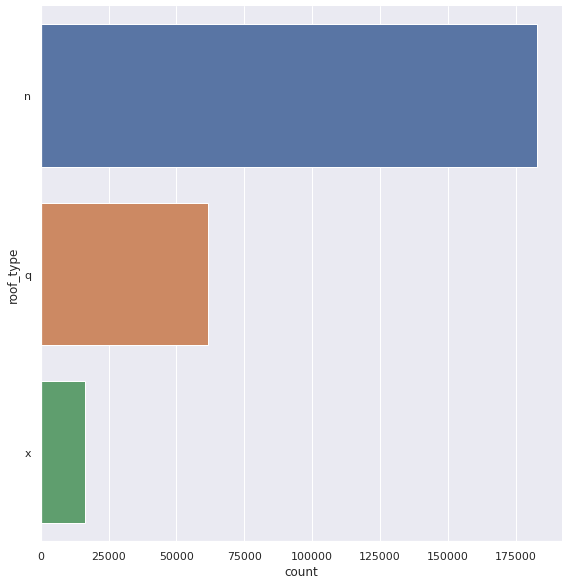

In [0]:
sb.catplot(y = 'land_surface_condition', data = catData, kind = "count", height = 8)

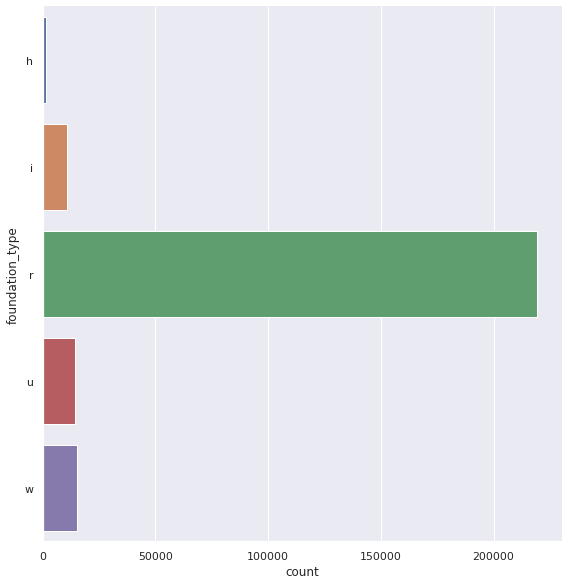

In [0]:
sb.catplot(y = 'foundation_type', data = catData, kind = "count", height = 8)

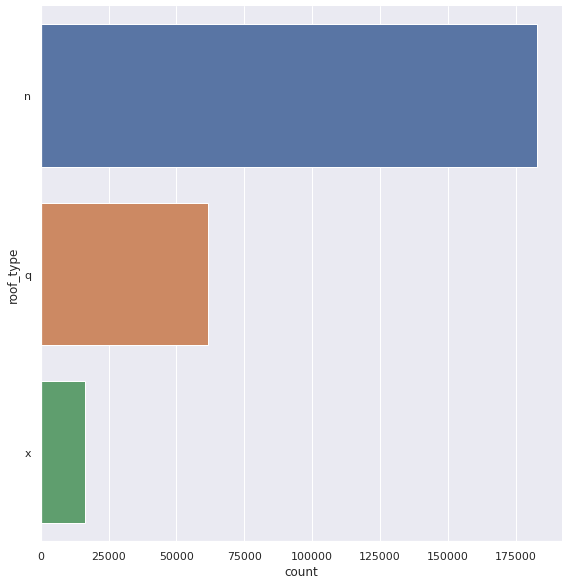

In [0]:
sb.catplot(y = 'roof_type', data = catData, kind = "count", height = 8)

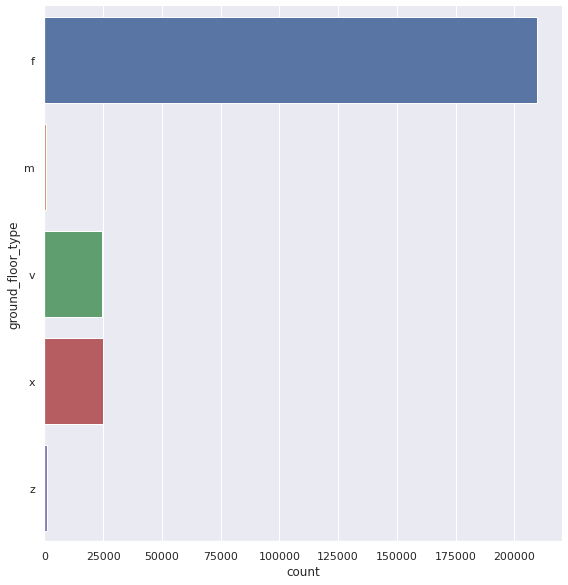

In [0]:
sb.catplot(y = 'ground_floor_type', data = catData, kind = "count", height = 8)

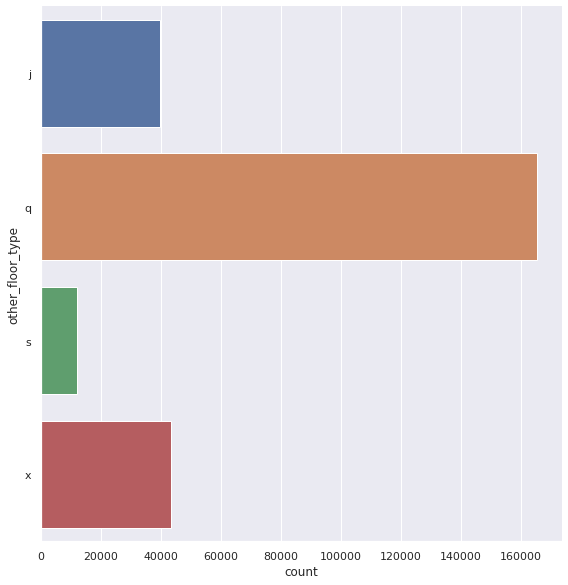

In [0]:
sb.catplot(y = 'other_floor_type', data = catData, kind = "count", height = 8)

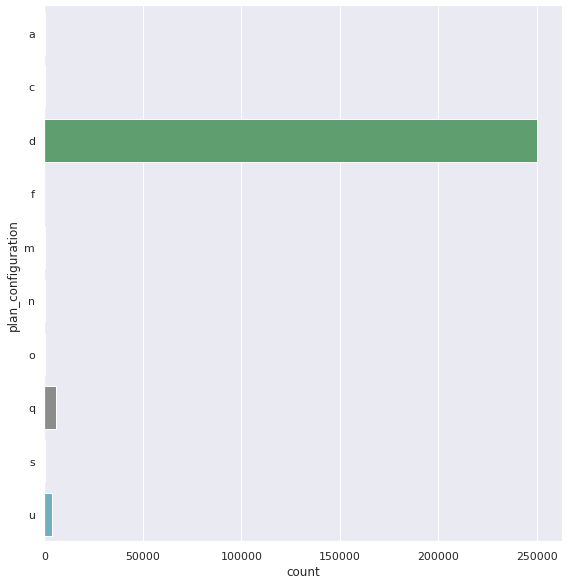

In [0]:
sb.catplot(y = 'plan_configuration', data = catData, kind = "count", height = 8)

In [0]:
# Distribution of BldgType across MSSubClass
f, axes = plt.subplots(1, 1, figsize=(20, 8))
sb.heatmap(catData.groupby(['BldgType', 'MSSubClass']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

In [0]:
damagegrade = pd.DataFrame(df3[['damage_grade']])
NewCatData = pd.concat([catData, damagegrade.reindex(index=catData.index)], sort = False, axis = 1)
NewCatData.head()

land_surface_condition foundation_type  ... plan_configuration damage_grade
0                      t               r  ...                  d            3
1                      o               r  ...                  d            2
2                      t               r  ...                  d            3
3                      t               r  ...                  d            2
4                      t               r  ...                  d            3

[5 rows x 8 columns]

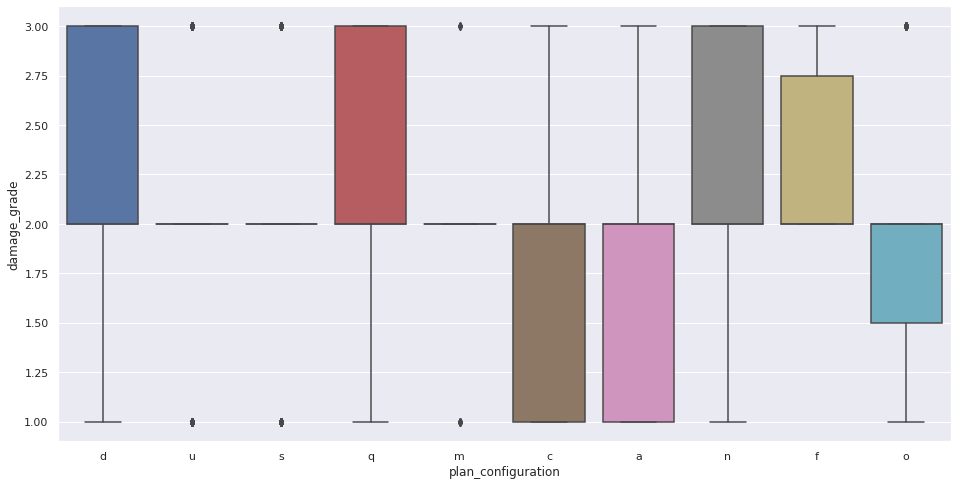

In [0]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'land_surface_condition', y = 'damage_grade', data = NewCatData)', y = 'damage_grade', data = NewCatData)', y = 'damage_grade', data = NewCatData)

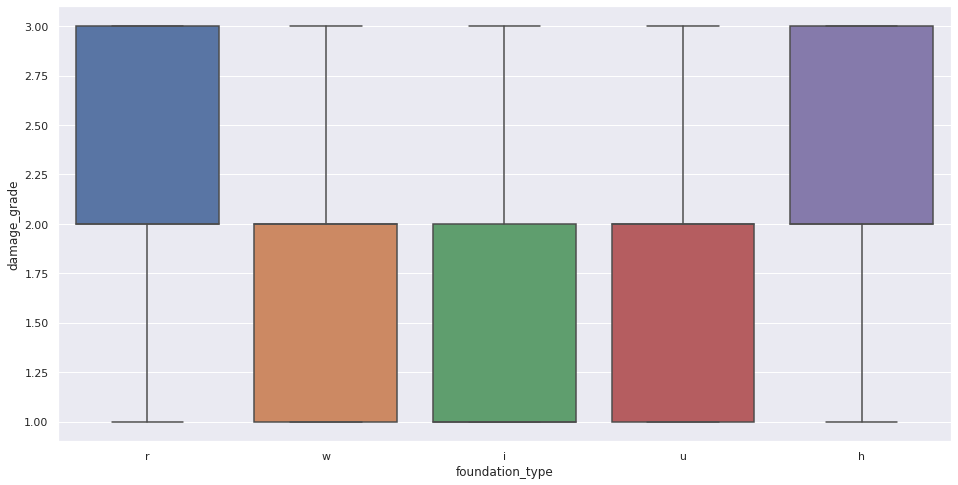

In [0]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'foundation_type', y = 'damage_grade', data = NewCatData)

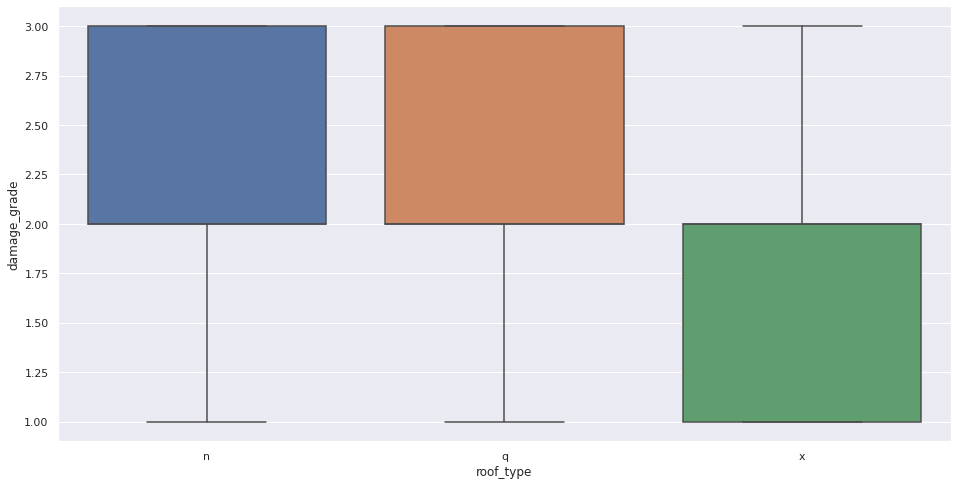

In [0]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'roof_type', y = 'damage_grade', data = NewCatData)

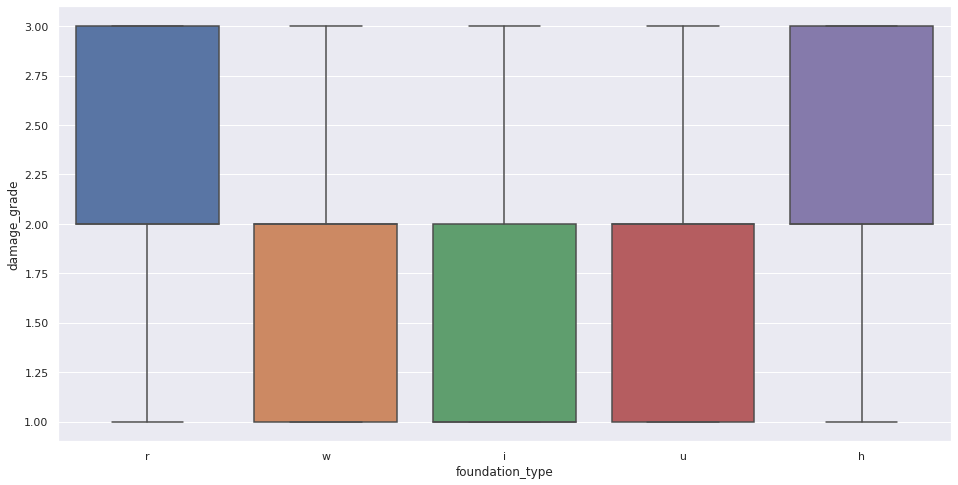

In [0]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'foundation_type', y = 'damage_grade', data = NewCatData)

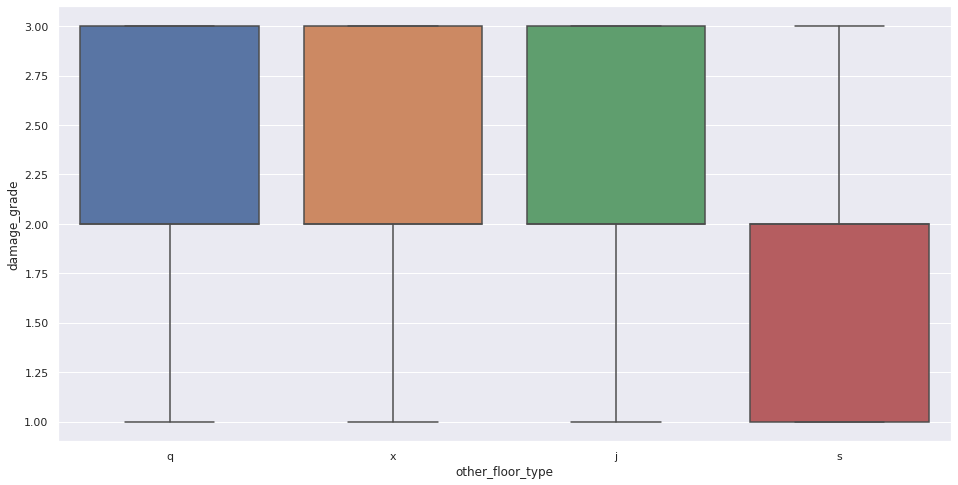

In [0]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'other_floor_type', y = 'damage_grade', data = NewCatData)

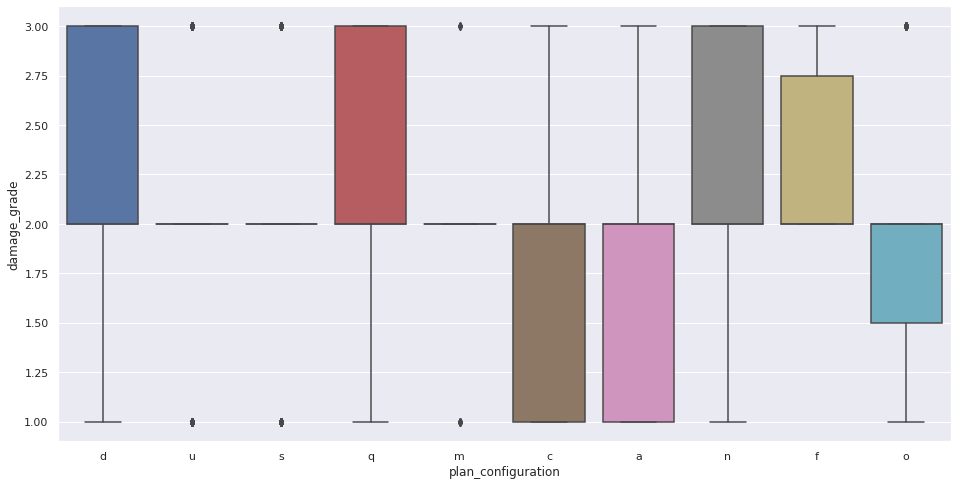

In [0]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'plan_configuration', y = 'damage_grade', data = NewCatData)